# Name: Ninan P Oommen

# Task 1: To predict the percentage of a student based on the number of study hours using supervised machine learning.

In [1]:
# Loading the required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# Importing the dataset

data = pd.read_excel("Data (1).xlsx")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Fig1. Scatter Plot between Number of Hours studied and Percentage Score

<function matplotlib.pyplot.show(close=None, block=None)>

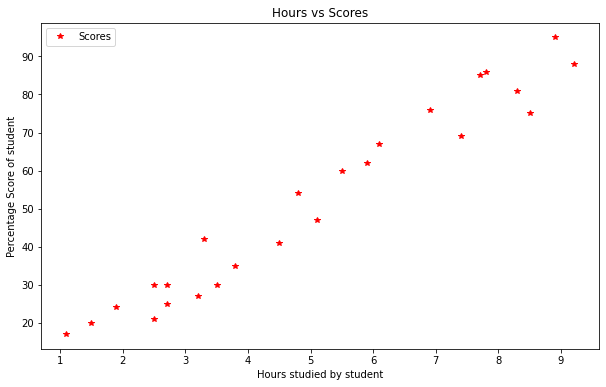

In [4]:
plt.rcParams["figure.figsize"] = (10,6)
data.plot(x='Hours', y='Scores', style='*',color='red')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied by student')
plt.ylabel('Percentage Score of student')
plt.show

# Interpretation: This scatter plot clearly demonstrates that there is a positive correlation between the percentage of a student and hours studied by the students.

# Fig 2. Box Plot for the number of hours studied

Text(0.5, 1.0, 'Box plot of hours studied by students')

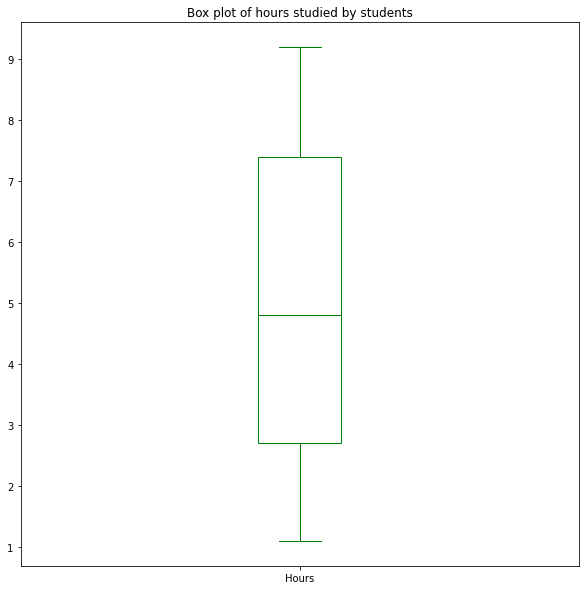

In [5]:
data.Hours.plot.box(color="green",figsize=(10,10))
plt.title("Box plot of hours studied by students")

# Interpretation: The above plot shows that the median hours of study per day by student is almost 5 hours. It also shows that there is no outliers and that it is not normally distributed since median is not equal to mean.

# Fig 3. Box plot for Scores of students

Text(0.5, 1.0, 'Box plot of Scores of students')

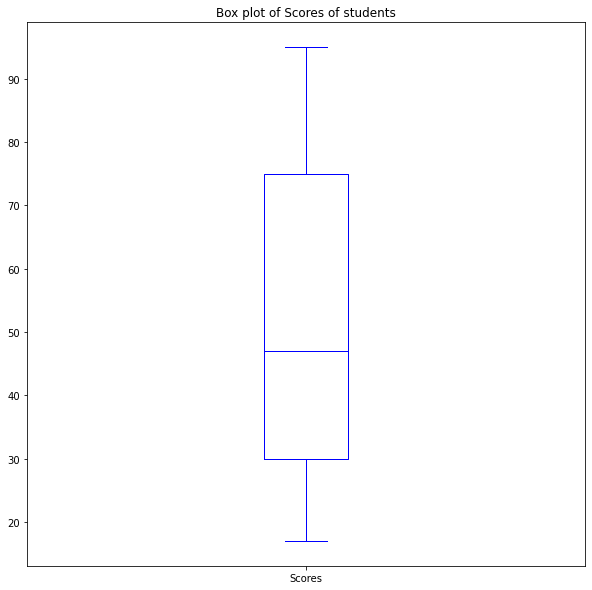

In [6]:
data.Scores.plot.box(color="blue",figsize=(10,10))
plt.title("Box plot of Scores of students")

# Interpretation: The above plot shows that the percentage of score by a student is around 48%.  It also shows that there is no outliers and that it is not normally distributed since median is not equal to mean.

# Fig 4. Correlation heat map of number of hours studied and the percentage score

<function matplotlib.pyplot.show(close=None, block=None)>

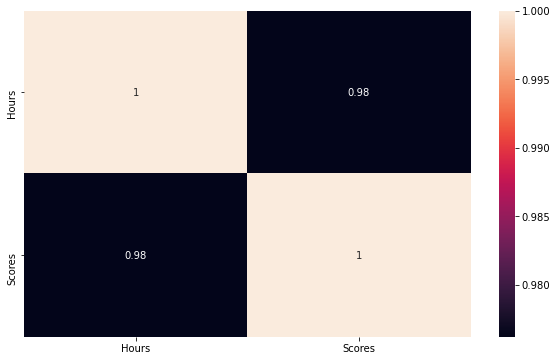

In [7]:
corrmatrix=data.corr()
sn.heatmap(corrmatrix, annot=True)
plt.show

# Interpretation: The correlation coefficient obtained is 0.98 which implies that the hours of study and the percentage scored by a student is highly positively correlated.

# Data preparation:

The next step is to divide the data into attributes (inputs) and labels (outputs) 

In [8]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

Now we have our attributes and labels. The next step is to split the data into training and test sets using train_test_split() method.

# Splitting data into training and testing sets

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
print("Dimension of training set of scores =", X_train.ndim)
print("Dimension of training set of hours =", y_train.ndim)

Dimension of training set of scores = 2
Dimension of training set of hours = 1


# Training the Algorithm

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("The training is completed")

The training is completed


# Making prediction on training set and checking the RMSE

In [12]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.9454906892105355

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred,squared=False)

4.647447612100367

# Interpretation: The model has an accuracy score of 0.9454. i.e, it is 95% good fit with its RMSE of 4.64%

# Fig 5. Plotting the regression line and the test data

Text(0.5, 1.0, 'Plotting for the test data and regression line')

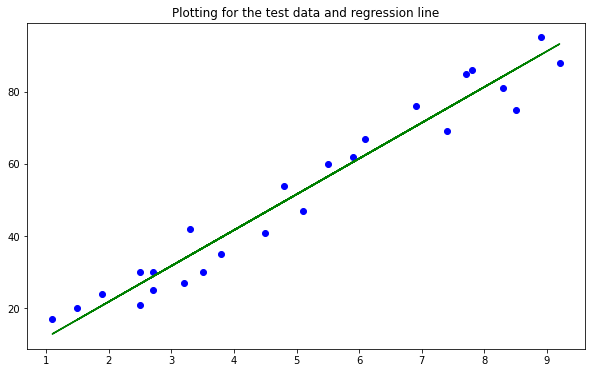

In [14]:
line = model.coef_*X + model.intercept_
plt.scatter(X, y, color="blue")
plt.plot(X, line, color="green")
plt.title("Plotting for the test data and regression line")

# Prediction

In [15]:
#To predict the score of a student if he/she studies 9.25 hours per day

hours = 9.25
model.predict([[hours]])

array([93.69173249])

# Interpretation: A student scores 93.69% if they study for 9.25 hours per day.